In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
#Create set of random longitudes and latitudes
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add longs and lats to list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b678863f11170c9174d8e751c2d822ad


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#Loop through all cities in list
for i, city in enumerate(cities):
    
    #Group cities in blocks of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URLwith each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log URL, record, and set numbers and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to record_count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bengkulu
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | copiapo
Processing Record 5 of Set 1 | patos
Processing Record 6 of Set 1 | rovaniemi
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | san patricio
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | ostrovnoy
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | vila velha
Processing Record 19 of Set 1 | san jorge
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | lavrentiya
Processing Record 22 of Set 1 | oktyabrskiy
Processing Record 23 of Set 1 | lamu
Pr

Processing Record 40 of Set 4 | thompson
Processing Record 41 of Set 4 | zhitikara
City not found. Skipping...
Processing Record 42 of Set 4 | nang rong
Processing Record 43 of Set 4 | kasempa
Processing Record 44 of Set 4 | pochutla
Processing Record 45 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 46 of Set 4 | nhulunbuy
Processing Record 47 of Set 4 | caluquembe
Processing Record 48 of Set 4 | denpasar
Processing Record 49 of Set 4 | touros
Processing Record 50 of Set 4 | aksarka
Processing Record 1 of Set 5 | suez
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | jinchang
Processing Record 4 of Set 5 | gat
Processing Record 5 of Set 5 | antropovo
Processing Record 6 of Set 5 | itarema
Processing Record 7 of Set 5 | fazilka
Processing Record 8 of Set 5 | samusu
City not found. Skipping...
Processing Record 9 of Set 5 | korla
Processing Record 10 of Set 5 | berdigestyakh
Processing Record 11 of Set 5 | airai
Processing Re

Processing Record 30 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 31 of Set 8 | syracuse
Processing Record 32 of Set 8 | tingo maria
Processing Record 33 of Set 8 | luena
Processing Record 34 of Set 8 | peniche
Processing Record 35 of Set 8 | uglegorsk
Processing Record 36 of Set 8 | ormara
Processing Record 37 of Set 8 | drovyanaya
Processing Record 38 of Set 8 | umea
Processing Record 39 of Set 8 | mercedes
Processing Record 40 of Set 8 | dospat
Processing Record 41 of Set 8 | kars
Processing Record 42 of Set 8 | salalah
Processing Record 43 of Set 8 | brae
Processing Record 44 of Set 8 | grand-santi
Processing Record 45 of Set 8 | george
Processing Record 46 of Set 8 | saint-francois
Processing Record 47 of Set 8 | olinda
Processing Record 48 of Set 8 | kashi
Processing Record 49 of Set 8 | shelburne
Processing Record 50 of Set 8 | komsomolskiy
Processing Record 1 of Set 9 | kalmunai
Processing Record 2 of Set 9 | pisco
Processing Record 3 of Set 9 | grenfell


Processing Record 21 of Set 12 | ucluelet
Processing Record 22 of Set 12 | puerto del rosario
Processing Record 23 of Set 12 | agarak
Processing Record 24 of Set 12 | cape elizabeth
City not found. Skipping...
Processing Record 25 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 26 of Set 12 | road town
Processing Record 27 of Set 12 | magliz
City not found. Skipping...
Processing Record 28 of Set 12 | kutulik
Processing Record 29 of Set 12 | imeni poliny osipenko
Processing Record 30 of Set 12 | kodinar
Processing Record 31 of Set 12 | kamenka
Processing Record 32 of Set 12 | omboue
Processing Record 33 of Set 12 | jacareacanga
Processing Record 34 of Set 12 | mitsamiouli
Processing Record 35 of Set 12 | varna
Processing Record 36 of Set 12 | tambul
City not found. Skipping...
Processing Record 37 of Set 12 | kodinsk
Processing Record 38 of Set 12 | cooma
Processing Record 39 of Set 12 | namatanai
Processing Record 40 of Set 12 | thayetmyo
Processing Record 41 o

In [9]:
len(city_data)

578

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.8004,102.2655,77.22,86,96,4.00,ID,2021-04-12 15:28:53
1,Atuona,-9.8000,-139.0333,78.75,82,43,16.42,PF,2021-04-12 15:28:54
2,Dikson,73.5069,80.5464,25.52,95,100,17.16,RU,2021-04-12 15:28:54
3,Copiapo,-27.3667,-70.3333,59.00,77,40,3.44,CL,2021-04-12 15:28:54
4,Patos,-7.0244,-37.2800,93.18,36,100,5.46,BR,2021-04-12 15:28:55
5,Rovaniemi,66.5000,25.7167,37.40,56,0,4.61,FI,2021-04-12 15:28:55
6,Rikitea,-23.1203,-134.9692,77.97,71,14,9.42,PF,2021-04-12 15:28:55
7,Nikolskoye,59.7035,30.7861,64.40,27,0,8.95,RU,2021-04-12 15:28:56
8,San Patricio,28.0170,-97.5169,80.01,78,40,11.50,US,2021-04-12 15:28:56
9,Tasiilaq,65.6145,-37.6368,30.20,59,10,8.05,GL,2021-04-12 15:28:57


In [11]:
#Rearranging columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df[new_column_order]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bengkulu,ID,2021-04-12 15:28:53,-3.8004,102.2655,77.22,86,96,4.00
1,Atuona,PF,2021-04-12 15:28:54,-9.8000,-139.0333,78.75,82,43,16.42
2,Dikson,RU,2021-04-12 15:28:54,73.5069,80.5464,25.52,95,100,17.16
3,Copiapo,CL,2021-04-12 15:28:54,-27.3667,-70.3333,59.00,77,40,3.44
4,Patos,BR,2021-04-12 15:28:55,-7.0244,-37.2800,93.18,36,100,5.46
...,...,...,...,...,...,...,...,...,...
573,Ambilobe,MG,2021-04-12 15:32:25,-13.2000,49.0500,77.16,82,81,2.64
574,Waco,US,2021-04-12 15:32:07,31.5493,-97.1467,72.00,78,1,14.97
575,La Cruz,MX,2021-04-12 15:32:25,23.9167,-106.9000,73.99,84,0,4.50
576,Cap Malheureux,MU,2021-04-12 15:32:25,-19.9842,57.6142,73.40,94,75,4.61


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#Get relevant fields
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

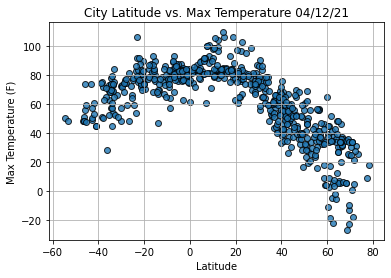

In [14]:
import time

#Build scatter for lats vs max temp
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")

#Other graph elements
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#Save fig
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

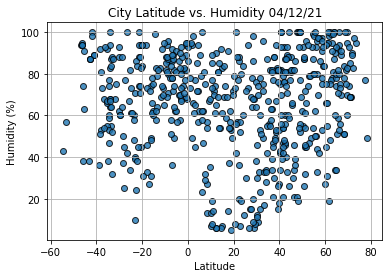

In [15]:
#Build scatter for lats vs humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")

#Other graph elements
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Save fig
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

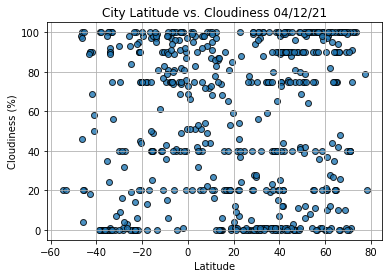

In [16]:
#Build scatter for lats vs cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")

#Other graph elements
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Save fig
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

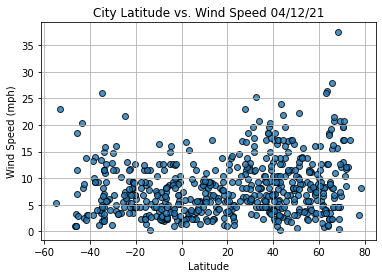

In [17]:
#Build scatter for lats vs wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")

#Other graph elements
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#Save fig
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()